In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

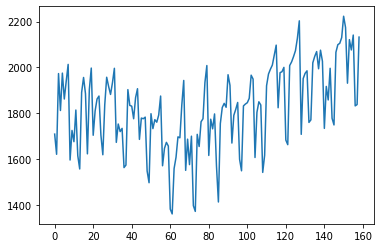

In [3]:
Walmart = pd.read_csv("/content/footfalls.csv")
Walmart.Footfalls.plot()

# Splitting data

In [4]:
Train = Walmart.head(147)
Test = Walmart.tail(12)
Test.tail()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0
158,Mar-04,2132,159,7.664816,25281,0,0,1,0,0,0,0,0,0,0,0,0


# Moving Average 

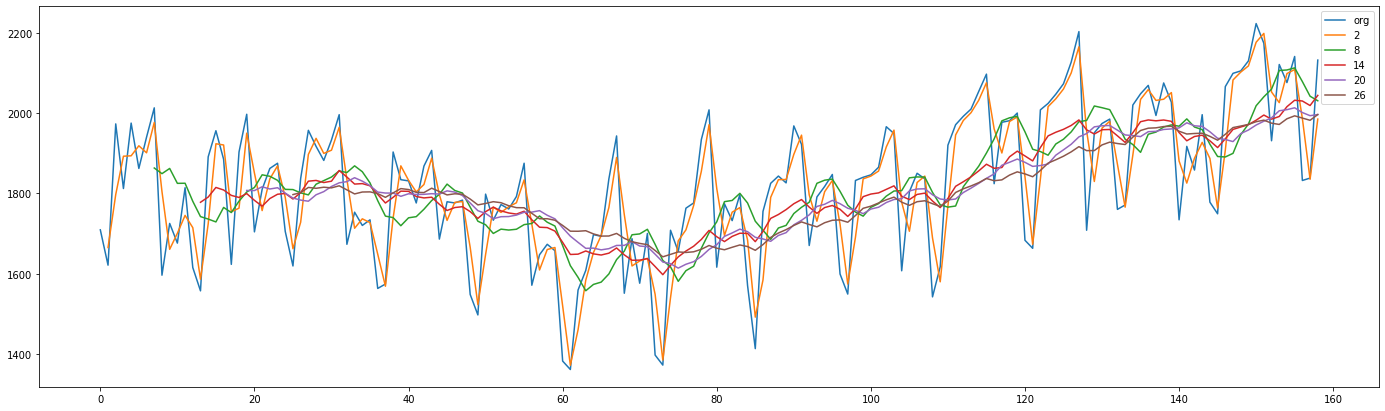

In [5]:
plt.figure(figsize=(24,7))
Walmart.Footfalls.plot(label="org")
for i in range(2,30,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


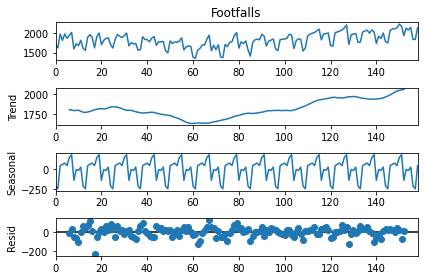

In [6]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,freq= 12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots


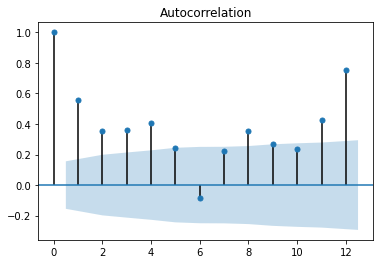

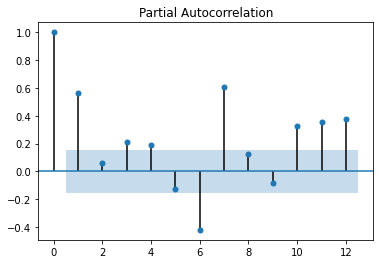

In [7]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
plt.show()


### Evaluation Metric MAPE

In [8]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [9]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


8.490637057828364

### Holt method 

In [10]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend


In [11]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

2.6748196958856236

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [12]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

4.238666032273202

## Final Model by combining train and test

In [13]:
hwe_model_add_add = ExponentialSmoothing(Walmart.Footfalls,seasonal="add",trend="add",seasonal_periods=12).fit()

In [14]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2152.457473
160    2165.602422
161    2162.802663
162    2247.700393
163    2244.034122
164    1952.378271
165    2142.193951
166    2117.779535
167    2183.834006
168    1909.820546
dtype: float64